# crime reported in Toronto

In [11]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go

In [12]:
crime_in_toronto = pd.read_csv('C://Users//mande//OneDrive//Desktop/crime.csv')

In [13]:
df= pd.DataFrame(crime_in_toronto)
df

,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,ucr_ext,offence,...,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude
0,246701,GO-20212596,D14,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,...,January,1,1,Friday,13,Assault,78,Kensington-Chinatown,-79.401107,43.652274
1,246702,GO-20211711,D52,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,2120,200,B&E,...,January,1,1,Friday,1,Break and Enter,76,Bay Street Corridor,-79.383726,43.655716
2,246703,GO-20212771,D31,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,1610,200,Robbery - Mugging,...,January,1,1,Friday,13,Robbery,26,Downsview-Roding-CFB,-79.508595,43.720916
3,246704,GO-20212162,D41,2021/01/01 05:00:00+00,2021/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,100,Assault,...,January,1,1,Friday,8,Assault,125,Ionview,-79.273833,43.725777
4,246912,GO-202118253,D13,2021/01/01 05:00:00+00,2021/01/04 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,1430,100,Assault,...,January,1,1,Friday,20,Assault,107,Oakwood Village,-79.447646,43.696259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34272,282132,GO-202229256,D13,2021/12/31 05:00:00+00,2022/01/05 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,200,B&E,...,December,31,365,Friday,13,Break and Enter,106,Humewood-Cedarvale,-79.426842,43.683309
34273,282766,GO-202275159,D23,2021/12/31 05:00:00+00,2022/01/12 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2132,200,Theft From Motor Vehicle Over,...,December,31,365,Friday,17,Theft Over,9,Edenbridge-Humber Valley,-79.512447,43.685515
34274,283686,GO-2022148021,D51,2021/12/31 05:00:00+00,2022/01/23 05:00:00+00,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,2135,210,Theft Of Motor Vehicle,...,December,31,365,Friday,22,Auto Theft,77,Waterfront Communities-The Island,-79.368879,43.649733
34275,285725,GO-2022293985,D33,2021/12/31 05:00:00+00,2022/02/14 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,2130,210,Theft Over,...,December,31,365,Friday,0,Theft Over,46,Pleasant View,-79.325354,43.780352


# crime in different locations 

In 2021, 34,277 recorded cases in Toronto, illustrating the city's.In 2021, there will be 34,277 recorded cases in Toronto

In [14]:
type1 = df['premises_type'].unique()
type1

array(['Apartment', 'Commercial', 'House', 'Outside', 'Transit', 'Other',
       'Educational'], dtype=object)

In [15]:
Commercial= df[df['premises_type']== 'Commercial'].count()
House_crime= df[df['premises_type']== 'House'].count()
Outside_crime=df[df['premises_type']== 'Outside'].count()
Transit_crime=df[df['premises_type']== 'Transit'].count()
other_crime=df[df['premises_type']== 'Other'].count()
Educational_crime=df[df['premises_type']== 'Educational'].count()

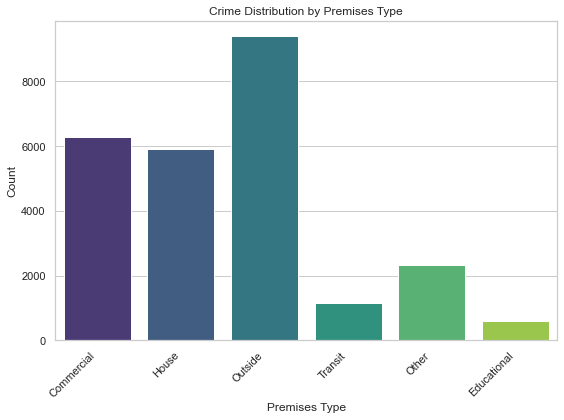

In [63]:
# Count premises type
commercial_crime = df[df['premises_type'] == 'Commercial'].count()['event_unique_id']
house_crime = df[df['premises_type'] == 'House'].count()['event_unique_id']
outside_crime = df[df['premises_type'] == 'Outside'].count()['event_unique_id']
transit_crime = df[df['premises_type'] == 'Transit'].count()['event_unique_id']
other_crime = df[df['premises_type'] == 'Other'].count()['event_unique_id']
educational_crime = df[df['premises_type'] == 'Educational'].count()['event_unique_id']

# Create a DataFrame
data = pd.DataFrame({
    'Premises Type': ['Commercial', 'House', 'Outside', 'Transit', 'Other', 'Educational'],
    'Count': [commercial_crime, house_crime, outside_crime, transit_crime, other_crime, educational_crime]
})

# Create a pie chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(data=data, x='Premises Type', y='Count', palette='viridis')
plt.title('Crime Distribution by Premises Type')
plt.xlabel('Premises Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


According to the data, outdoor places have the largest number of crimes (9402 incidents), 
need for greater safety measures in publicspaces. Each year, around 6000 crimes occur in commercial 
and residential sectors, underscoring the significance of security in both commercial and domestic places.
There are 1156 crimes reported in transit places, compared to around 2000 crimes reported in other undefined areas.
These findings point to the necessity for specific tactics to combat crime in various situations and assure community 
safety generally.

# offence	

In [17]:
type_offence = df['offence'].unique()

In [18]:
# Count the occurrences of each offence type
offence_counts = df['offence'].value_counts().reset_index()

# Rename the columns
offence_counts.columns = ['Offence Type', 'Count']

# Sort the offences based on count in descending order
offence_counts = offence_counts.sort_values('Count', ascending=False)

# Calculate the total number of offences
total_offences = len(df)

# Calculate the percentage of each offence type
offence_percentages = (offence_counts['Count'] / total_offences) * 100

# Create a summary list
summary_list = []
for index, row in offence_counts.iterrows():
    offence_type = row['Offence Type']
    count = row['Count']
    percentage = offence_percentages[index]
    summary = f"{offence_type}: {count} cases ({percentage:.2f}%)"
    summary_list.append(summary)
# Print the summary list
for summary in summary_list:
    print(summary)

Assault: 12737 cases (37.16%)
Theft Of Motor Vehicle: 6541 cases (19.08%)
B&E: 4846 cases (14.14%)
Assault With Weapon: 3377 cases (9.85%)
Assault Bodily Harm: 675 cases (1.97%)
B&E W'Intent: 653 cases (1.91%)
Assault Peace Officer: 579 cases (1.69%)
Theft Over: 530 cases (1.55%)
Robbery - Mugging: 491 cases (1.43%)
Robbery - Business: 480 cases (1.40%)
Robbery - Other: 473 cases (1.38%)
Robbery With Weapon: 381 cases (1.11%)
Theft From Motor Vehicle Over: 312 cases (0.91%)
Discharge Firearm With Intent: 263 cases (0.77%)
Aggravated Assault: 237 cases (0.69%)
Assault - Resist/ Prevent Seiz: 236 cases (0.69%)
Unlawfully In Dwelling-House: 209 cases (0.61%)
Discharge Firearm - Recklessly: 181 cases (0.53%)
Theft From Mail / Bag / Key: 160 cases (0.47%)
Pointing A Firearm: 146 cases (0.43%)
Robbery - Vehicle Jacking: 125 cases (0.36%)
Assault Peace Officer Wpn/Cbh: 92 cases (0.27%)
Robbery - Swarming: 91 cases (0.27%)
Robbery - Home Invasion: 90 cases (0.26%)
Robbery - Purse Snatch: 67 ca

Based on the statistics supplied, the distribution of crime in Toronto reveals interesting tendencies. Assault is the most common infraction, accounting for 37.16% of all instances, closely followed by Theft of Motor Vehicle (19.08%). Break and Enter comes third, accounting for 14.14% of all instances. Robbery of various categories, such as Robbery - Mugging, Robbery - Business, and Robbery - Other, account for around 1% of the total. While other acts have lower numbers, they nonetheless reflect the city's range of criminal activity. It is crucial to highlight that this research is only a snapshot and may not represent the entire criminal environment. For a complete understanding of crime patterns in Toronto, additional information such as temporal and geographical elements are required.

# occurrencemonth

In [19]:
# Group the data by month and count 
monthly_counts = df.groupby('occurrencemonth').size().reset_index(name='Count')
monthly_counts

,occurrencemonth,Count
0,April,2378
1,August,3235
2,December,2930
3,February,2226
4,January,2574
5,July,3024
6,June,2931
7,March,2548
8,May,2978
9,November,3019


# mamximum crime can be seen in oct,followed by sept, where as least can we seen april and feb 

In [27]:
# order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

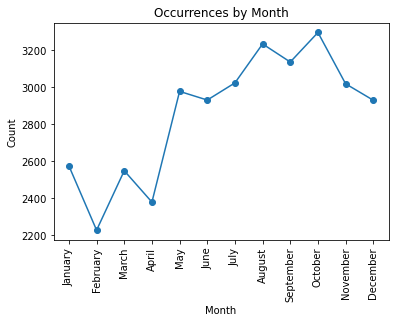

In [53]:
# Assuming you have the monthly_counts dataframe
monthly_counts = pd.DataFrame({
    'occurrencemonth': ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May',
                        'November', 'October', 'September'],
    'Count': [2378, 3235, 2930, 2226, 2574, 3024, 2931, 2548, 2978, 3019, 3297, 3137]
})

# Sort the months based on the specified order
monthly_counts = monthly_counts.sort_values(by='occurrencemonth', key=lambda x: pd.Categorical(x, categories=month_order))

# Create a line graph
fig = px.line(monthly_counts, x='occurrencemonth', y='Count', title='Occurrences by Month')

# Customize the appearance
fig.update_layout(xaxis_title='Month', yaxis_title='Count')

# Display the line graph
fig.show()

# Create the line graph
plt.plot(monthly_counts['occurrencemonth'], monthly_counts['Count'], marker='o')

# Customize the appearance
plt.title('Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# occurrencedayofweek	

In [30]:
occurrencemonth_in_weekdays = df['occurrencedayofweek'].unique()
occurrencemonth_in_weekdays 

array(['Friday    ', 'Saturday  ', 'Sunday    ', 'Monday    ',
       'Tuesday   ', 'Wednesday ', 'Thursday  '], dtype=object)

In [24]:
# Group the data by month and count the occurrences
weekly_counts = df.groupby('occurrencedayofweek').size().reset_index(name='Count')
weekly_counts

,occurrencedayofweek,Count
0,Friday,5114
1,Monday,4750
2,Saturday,5055
3,Sunday,4889
4,Thursday,4883
5,Tuesday,4698
6,Wednesday,4888


# Neighbourhood

In [37]:
Neighbourhood = df['Neighbourhood'].unique()


In [38]:
crime_n =df.groupby('Neighbourhood').size().reset_index(name='Count')
crime_n

,Neighbourhood,Count
0,Agincourt North,138
1,Agincourt South-Malvern West,253
2,Alderwood,83
3,Annex,586
4,Banbury-Don Mills,152
...,...,...
136,Wychwood,108
137,Yonge-Eglinton,125
138,Yonge-St.Clair,101
139,York University Heights,676


In [51]:
Neighbourhood1 = df['Neighbourhood']

In [61]:
# Count the occurrences of each neighbourhood
neighbourhood_counts = df['Neighbourhood'].value_counts().reset_index()
neighbourhood_counts.columns = ['Neighbourhood', 'Count']

# Sort the neighbourhoods by count in descending order
neighbourhood_counts = neighbourhood_counts.sort_values(by='Count', ascending=False)

# Create a bar chart
fig = px.bar(neighbourhood_counts, x='Count', y='Neighbourhood', orientation='h', title='Crime Occurrences by Neighbourhood')

# Customize the appearance
fig.update_layout(xaxis_title='Number of Crimes', yaxis_title='Neighbourhood', yaxis_categoryorder='total ascending',
                  xaxis_tickformat=',d', bargap=0.2)

# Add data labels to the bars
fig.update_traces(textposition='outside', texttemplate='%{x:,}')

# Adjust the figure size for better readability
fig.update_layout(height=800)

# Display the bar chart
fig.show()


Waterfront Island is the neighbourhood with the greatest crime rate in the dataset, owing to its urban setting and appeal. Beystreet in downtown and Westhill have greater crime rates, which might be attributed to their central positions and higher population concentrations. Woodsteel, Maple Leaf, and Woodbine Lumsden, on the other hand, have lower crime rates, which may be due to their residential character, lower population density, or excellent community policing. This data may help law enforcement and local communities allocate resources, avoid targeted crime, and build safer neighbourhoods via evidence-based solutions and community participation.

# conclusion 

In 2021, there were 34,277 reported crimes in Toronto, with outdoor locations having the highest crime rates,
highlighting the need for greater public safety measures. Significant occurrences occurred in the commercial and
residential sectors, underscoring the significance of security in these locations. Assault, theft of a motor vehicle,
and break and enter were the most prevalent offences. Waterfront Island, Beystreet, and Westhill are high-crime areas
that need targeted enforcement, whereas Woodsteel, Maple Leaf, and Woodbine Lumsden demonstrate excellent community policing.
This information is valuable for resource allocation and evidence-based community safety programs.